In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

## Simple Linear Regression

In [2]:
data = pd.read_csv('student_scores.csv')
data.shape

(25, 2)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


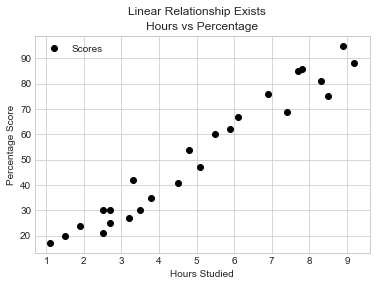

In [5]:
data.plot(x='Hours', y='Scores', style='o', color='black')
plt.title('Hours vs Percentage')
plt.suptitle('Linear Relationship Exists')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Preparing the Data
Now we have an idea about statistical details of our data. 

The next step is to divide the data into "attributes" and "labels". 
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. 

In our dataset we only have two columns. We want to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. To extract the attributes and labels, execute the following script:

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

## Variable Distribution

Another assumption of linear regression is that the variables follow a normal distribution. In order words, we want to make sure that for each x value, y is a random variable following a normal distribution and its mean lies on the regression line. 

One of the ways to visually test for this assumption is through the use of the Q-Q-Plot (quantile-quantile). 

Quantile-Quantile plot compares two probability distributions in a visual manner.

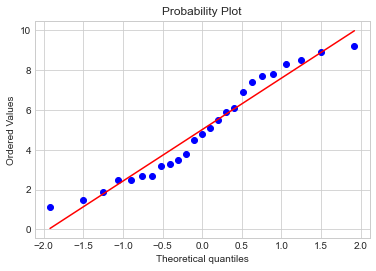

In [7]:
import scipy.stats as stats
stats.probplot(X[:,0], dist="norm", plot=plt)
plt.show()

Split this data into training and test sets.

The below script splits 80% of the data to training set while 20% of the data to test set. 

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Algorithm

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
print(regressor.intercept_)

2.0181600414346974


In [11]:
print(regressor.coef_)

[9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

## Predictions

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Merics
### Evaluating the Algorithm

In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


In [15]:
df.Predicted.mean() *10/100

4.2651851612067855

We can see that the value of RMSE is 4.64, which is < 10% of the average value of the % of all the students i.e. 56.58. This means that our algorithm did a decent job.

## Multiple Linear Regression

Almost all real world problems that we are going to encounter will have more than two variables. Linear regression involving multiple variables is called "multiple linear regression". 

Difference between simple & multiple lies in the evaluation. We can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

Here we will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.

dataset : https://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt

Reference:
Helmut Spaeth,
Mathematical Algorithms for Linear Regression,
Academic Press, 1991,
ISBN 0-12-656460-4.

S Weisberg,
Applied Linear Regression,
New York, 1980, pages 32-33.

### Discussion:

For one year, the consumption of petrol was measured in 48 states.
The relevant variables are the petrol tax, the per capita income, the number of miles of paved highway, and
the proportion of the population with driver's licenses.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
dataframe = pd.read_csv('petrol_consumption.csv')
dataframe.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


### Statiscics:

In [18]:
dataframe.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


## Train/test data:

In [19]:
X = dataframe[['Petrol_tax', 'Average_income', 'Paved_Highways',
               'Population_Driver_licence(%)']]
y = dataframe['Petrol_Consumption']

## Multi-colinearity assumption
Multicollinearity is a fancy way of saying that your independent variables are highly correlated with each other. Here X varuables are all independent and if multicollinearity exists between them, they are no longer independent and this generates issues when modeling linear regressions.

If we find any values in which the absolute value of their correlation is >=0.8, the multicollinearity assumption is being broken.

In [20]:
X.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037
Average_income,0.012665,1.000000,0.050163,0.157070
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training algorithm

In [22]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


- A unit increase in "petrol_tax", there is a decrease of 40.01 million gallons in gas consumption. 
- A unit increase in proportion of population with a drivers license results in an increase of 1.324 billion gallons of gas consumption. 

We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

## Prediction

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
RMSE =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % RMSE)

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.344787588363
RMSE: 68.311


In [27]:
# 10% of average prediction of all states
y_pred.mean() *10/100

56.58271074349215

We can see that the value of RMSE is 68.31, which is > 10% of the average value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, a few of which are listed here:

- Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
- Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualising the data may help you determine that.
- Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

## Homoscedasticity

The last assumption of linear regression is that of homoscedasticity, this analysis is also applied to the residuals of linear regression model and can be easily tested with a scatterplot of the residuals.

Homoscedasticity is present when the noise of our model can be described as random and the same throughout all independent variables. If by looking at the scatterplot of the residuals from our linear regression analysis we notice a random pattern, this is a clear sign that this assumption is true. 

In [28]:
residuals = y_test.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -16.42710743492153


Text(0.5, 1.0, 'Residuals vs fitted values plot for homoscedasticity check')

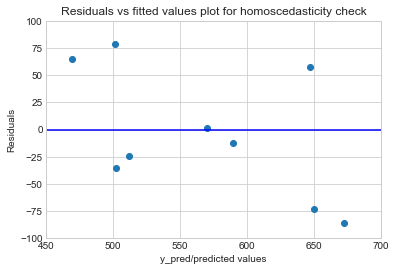

In [29]:
plt.scatter(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-100,100)
plt.xlim(450,700)
plt.plot([0,700],[0,0],color='blue')
plt.grid(True)
plt.title('Residuals vs fitted values plot for homoscedasticity check')